## **Maxuell Lucas  -** *20210037870*
**Trabalho 2 - Regressão Linear**


## O trabalho apresentado neste estudo se concentra na implementação de modelos de regressão linear utilizando tanto a solução analítica quanto o algoritmo de Gradiente Descendente. Este experimento oferece uma visão abrangente dos resultados de treinamento e erros de teste, incluindo a representação gráfica da curva de erro obtida com o Gradiente Descendente. Tudo isso foi realizado com o auxílio da linguagem de programação Python, utilizando um conjunto de dados disponibilizado pelo repositório da Universidade da Califórnia Irvine.

Os dados utilizados neste estudo foram coletados a partir do repositório de dados da Universidade da Califórnia Irvine, especializado em conjuntos de dados voltados para problemas de Machine Learning. Você pode acessá-lo por meio deste link (https://archive.ics.uci.edu/datasets). A escolha recaiu sobre um conjunto de dados que se concentra na Resistência à Compressão do Concreto, abrangendo oito características distintas. Essas características incluem propriedades como composição química, idade do concreto, entre outras. Este conjunto de dados possui um total de 1.031 exemplos, cada um deles associado a uma avaliação específica da qualidade do concreto.

Para conduzir o experimento de regressão linear, optou-se por utilizar os 618 primeiros exemplos para treinar o modelo. Isso  permitiu ajustar o modelo aos dados e aprender os padrões subjacentes à resistência do concreto. Os 413 exemplos restantes foram estrategicamente reservados para fins de validação e teste, permitindo avaliar o desempenho e a generalização do modelo.

Nas próximas seções, apresentarão-se detalhes sobre a implementação do modelo,  as técnicas utilizadas e  os resultados obtidos nesta análise abrangente. Este estudo oferece uma visão aprofundada das aplicações da regressão linear em um contexto prático e relevante para a indústria da construção civil e engenharia de materiais.


####*Bibliotecas utilizadas e a classe LMSTrainer()*

In [31]:
import numpy as np
import pandas as pd
from random import uniform
import matplotlib.pyplot as plt
from numpy.lib.function_base import gradient

# Classe LMSTrainer para treinamento de modelos de regressão linear
class LMSTrainer():

    def __init__(self, analytic=False):
        # Inicializar o objeto LMSTrainer com uma opção para solução analítica (default: False)
        self.analytic = analytic
        self.trained = False  # Indicar se o modelo foi treinado
        self.wModel = []      # Armazenar os coeficientes do modelo treinado

    def predict(self, X_test):
        # Realizar as previsões com base nos dados de teste X_test
        y_predicted = custos = np.zeros(len(X_test))
        index = 0
        if not self.trained:
            raise RuntimeError("Você deve treinar o classificador antes de fazer previsões!")
        else:
            return X_test @ self.wModel.T

    def custo(self, w, x, y):
        # Calcular o custo da função de regressão linear
        erro = (x @ w.T - y)
        custos = np.sum(np.power(erro,2))
        return custos/len(x)

    def fitGradiente(self, x, y, numFeatures, alfa=0.1, iteracoes=50):
        # Treinar o modelo utilizando o Gradiente Descendente
        custos = np.zeros(iteracoes)  # Armazenar os custos em cada época (iteração)
        w = np.random.rand(1, numFeatures + 1)  # Inicializar os coeficientes aleatoriamente
        for i in range(iteracoes):
            w = w - (alfa / len(x)) * np.sum((x @ w.T - y) * x, axis=0)  # Atualizar os coeficientes
            custos[i] = self.custo(w, x, y)  # Calcular o custo nesta época
        self.trained = True
        self.wModel = w  # Armazenar os coeficientes treinados
        return custos

    def fitAnalitic(self, x, y):
        # Treinar o modelo utilizando a solução analítica
        xTx = np.matmul(x.T, x)  # Multiplicaçãor de matrizes
        try:
            xTx_Inv = np.linalg.inv(xTx)  # Calcular a inversa da matriz xTx para dps fazer as operações
        except np.linalg.LinAlgError:
            print("Não é possível executar a solução analítica")  # Tratar erro se a inversa não puder ser calculada
        else:
            xTx_Inv_xT = np.matmul(xTx_Inv, x.T)  # Multiplicar a inversa pela transposta de x
            self.wModel = (xTx_Inv_xT @ y).T  # Calcular os coeficientes do modelo
            self.trained = True

# Função que insere uma coluna de números 1 na matriz de características
def inserir_um(X):
    ones = np.ones([X.shape[0],1])
    return np.concatenate((ones,X), axis=1)


### Aqui será carregado o Dataset escolhido, que pode ser encontrado através deste link :

https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength

In [32]:
from google.colab import drive

drive.mount('/content/drive')

import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Concrete_Data.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [33]:

import pandas as pd
#Carregando o dataset
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Concrete_Data.csv')

#normalizando os dados
(data - data.mean())/data.std()
dataset = (data-data.min())/(data.max()-data.min())

#Definindo dados para treinamento
xTraining = np.array(dataset.iloc[0:618, 0:7])
xTraining = inserir_um(xTraining)
yTraining = dataset.iloc[0:618, 6:7].values

### Definindo a quantidade de iterações e o alfa e criando uma classe de LMSTrainer e realizando o fit pelo Gradiente Descendente:

In [34]:
alfa = 0.1
iteracoes = 10000

lms = LMSTrainer()
custo = lms.fitGradiente(xTraining,yTraining,7, alfa,iteracoes)

### Erro durante as iterações. Gráfico :

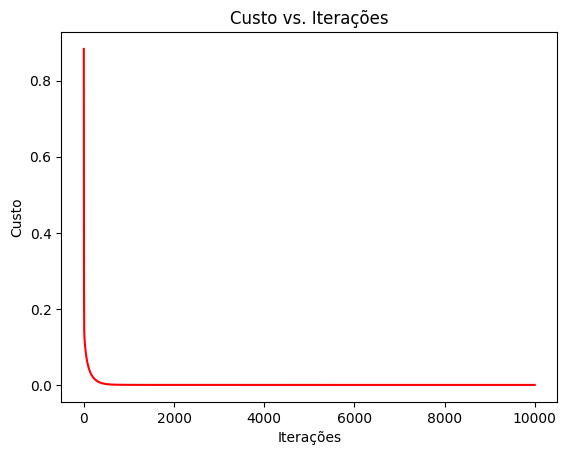

In [35]:
fig, ax = plt.subplots()
ax.plot(np.arange(iteracoes), custo, 'r')
ax.set_xlabel('Iterações')
ax.set_ylabel('Custo')
ax.set_title('Custo vs. Iterações')
plt.show()

Podemos ver no gráfico acima que o  algoritmo com o tempo vai convergindo  (quanto mais interações formos fazendo).

###  Modelo encontrado:

In [36]:
print(lms.wModel)

[[-0.03360366  0.01513169  0.01242648  0.00821805  0.01735622  0.00225112
   0.01285049  1.01580045]]


### Definindo os dados para teste:

In [37]:
xTest = np.array(dataset.iloc[618:, 0:7])
xTest = inserir_um(xTest)
yTest = dataset.iloc[618:, 7:8].values

### Erro médio para o treino e para oteste:

In [38]:
erro_treino = lms.custo(lms.wModel, xTraining, yTraining)
print("O erro de treino foi ", erro_treino)

erro_teste = lms.custo(lms.wModel, xTest, yTest)
print("O erro de teste foi: ", erro_teste)

O erro de treino foi  1.7292434300266569e-06
O erro de teste foi:  0.15839183678429375


### O modelo na forma analítica:

In [39]:
lms_analytic = LMSTrainer()
lms_analytic.fitAnalitic(xTraining,yTraining)
print(lms_analytic.wModel)

[[-2.38011000e-13  1.08149600e-13  6.82093271e-14  4.78297957e-14
   1.23481086e-13  1.69326358e-14  9.40289513e-14  1.00000000e+00]]


### Erro médio do modelo analítico para os dados de treinamento e teste:

In [40]:
erro_treino_analitico = lms_analytic.custo(lms_analytic.wModel, xTraining, yTraining)
print("O erro de treino foi: ", erro_treino_analitico)


erro_teste_analitico = lms_analytic.custo(lms_analytic.wModel, xTest, yTest)
print("O erro de teste foi: ", erro_teste_analitico)

O erro de treino foi:  2.109448062290762e-28
O erro de teste foi:  0.15919274893026572


Como podemos ver nos dois erros médios, o erro de treino foi menor isso tende-se porque  o modelo está sendo ajustado para se encaixar exatamente nos dados de treinamento